In [345]:
# library imports
from importlib import reload
from copy import deepcopy
from Classes import ClusterObj, BlockObj, ScanDataObj
from Functions import CommonFunctions, ClassesFunctions
import pickle
import pandas as pd
reload(CommonFunctions)
reload(ClassesFunctions)
reload(ClusterObj)
reload(BlockObj)
reload(ScanDataObj)

print('Done!')

Done!


In [346]:
# path setup
path = "/Users/afarinaqs/Library/CloudStorage/Box-Box/Home Folder aa714/Private/BME LAB/Afi/UHG/open format/"
input_file_name = '2024-11-10 slide6'

image, scaled_image = CommonFunctions.load_image(file_name=input_file_name, path=path, debug=False, plot_images=False, rotation=0)
print(f'Loaded Image "{input_file_name}" {image.shape}')


Loaded Image "2024-11-10 slide6" (14400, 4400)


In [347]:
# load the saved work, or start over:
scan_data = ClassesFunctions.read_scan_data_from_pickle(
    file_name=input_file_name,
    path=path,
    start_over=0, # if True -> ignores the pickle, and returns None for initiating with the following functions
    plot_results=False,
    debug=False
)


if scan_data is None:
    start_over = True

else:
    print(f'Successfully loaded scan_data for "{input_file_name}"')
    start_over = False



Successfully loaded scan_data for "2024-11-10 slide6"


In [348]:
# todo: add a function for parameter tuning...

In [349]:
## Setting the parameters:
# start_over = True
input_param_dict = {'scan_size': 5, 'assay': 'OF', 'cAb_names': ['cAb1', 'cAb2', 'cAb3', 'cAb4'], 'blur_kernel_size': 9,
                    'contrast_thr': 550, 'canny_edge_thr1': 30, 'canny_edge_thr2': 20, 'dp': 0.7, 'param1': 18,
                    'param2': 21, 'minRadius': 7, 'maxRadius': 19}

# reset = True/False to overwrite start_over
if start_over:
    ScanDataObj.init_or_reset_params(file_name=input_file_name, input_param_dict=input_param_dict, debug=False)

In [350]:
# test current parameters. can optimize them too if the results are not looking good.
if start_over:
    test_image = deepcopy(image)[700:1500,500:2500] #(y,x) -> change if u want!

    # checkme takes too long
    # CommonFunctions.optimize_the_params(file_name=input_file_name, input_image=test_image, how_many_times=1, plot_images=False, debug=False)

    CommonFunctions.test_current_parameters(input_image=test_image, file_name=input_file_name, fig_size=[9,9], debug=False)

In [351]:
# start_over=True
if start_over or not scan_data.sorted_circles:
    CommonFunctions.do_initial_circle_finding(file_name=input_file_name, debug=False, plot_images=False)
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
else:
    sorted_circles, predicted_clusters_ids = [],[]

In [352]:
scan_data = ScanDataObj.get_scan_data(input_file_name)
scan_data.assay

'OF'

In [353]:
# start_over = False
if start_over:
    ClassesFunctions.init_blocks_dict(
        file_name=input_file_name, debug=False, plot_blocks=0,
        # debug_block_ids=['r0c0','r0c1','r0c2','r0c3'],
        # init_offset=[-20,00],
        # block_size_adjustment=[100,100],
        # block_distance_adjustment=[-100,-110],
    )
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [354]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [355]:
# start_over = True
if start_over:
    ClassesFunctions.init_clusters_dict(scan_data.sorted_circles, scan_data.predicted_clusters_ids, input_file_name,
                                        optimize_spots_coords=True, debug=0, debug_clusters_ids=[])
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [356]:
# connect clusters and blocks (and final initiation stuff)
if start_over:
    ClassesFunctions.connect_clusters_to_blocks(file_name=input_file_name,debug=False,debug_clusters=[],debug_blocks=[],plot_images=False,)
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [357]:
scan_data.get_cluster(0).__dict__

{'cluster_id': 0,
 'file_name': '2024-11-10 slide6',
 'spots_coords_list': [[100, 400, 0],
  [100, 400, 0],
  [100, 400, 0],
  [100, 400, 0],
  [100, 400, 0],
  [581, 835, 17],
  [631, 836, 16],
  [682, 836, 17],
  [731, 836, 16],
  [779, 834, 19],
  [832, 838, 17]],
 'spots_coords_in_block_list': [array([0, 0, 0]),
  array([0, 0, 0]),
  array([0, 0, 0]),
  array([0, 0, 0]),
  array([0, 0, 0]),
  array([481, 435,  17]),
  array([531, 436,  16]),
  array([582, 436,  17]),
  array([631, 436,  16]),
  array([679, 434,  19]),
  array([732, 438,  17])],
 'avg_x': np.float64(430.54545454545456),
 'avg_y': np.float64(637.7272727272727),
 'avg_x_in_block': 330,
 'avg_y_in_block': 237,
 'avg_r': np.float64(9.272727272727273),
 'block_id': 'r0c0',
 'block_start_x': 100,
 'block_start_y': 400,
 'mean_fg_list': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'mean_bg_list': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  Non

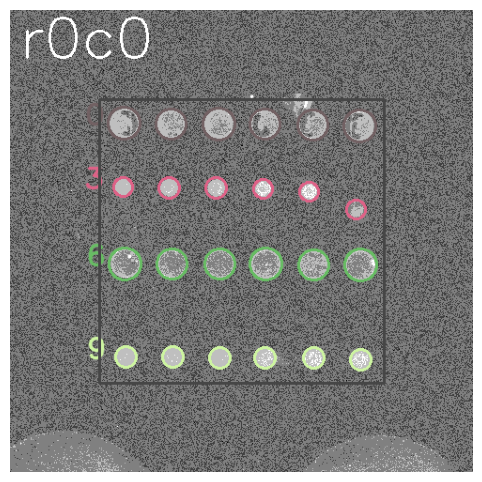

There are 4 clusters in total.


In [358]:
## Making the first template of cluster patterns
start_over=True

test_ind = f'r0c0'
test_block: BlockObj.Block = scan_data.get_block(test_ind)
if start_over:
    scan_data = ScanDataObj.get_scan_data(file_name=input_file_name)
    manual_spot_edit_dict = {
        0:['del spot4,3,2,1,0','change_r spot-2 r-3','move spot-2 3 r, 3 d'],
        3:['add 2 to r','move spot-2 115 l, 3 u','move spot-1 82 l, 19 d'],
        9:['add 2 to r','move spot-2 118 l','move spot-1 82 l, 2 d']
    }
    test_block.edit_block(debug=0, plot_before_after=False, overwrite=True,with_restore=True,
                          manual_spot_edit_dict=manual_spot_edit_dict)
    test_mask = test_block.create_block_mask(debug=False, plot_images=False)
    test_block.plot_block(fig_size=[6, 6], debug=False, with_border=True, crop_to_mask=True)
    N = len(test_block.clusters_ids_list)
    print(f'There are {N} clusters in total.')
    # print(test_block.full_report(1))


In [359]:
# generating the list to edit each row at the same time
generate_list = lambda n: [f'r{n}c{i}' for i in range(scan_data.block_ncol)]
rows_names_list = []
for r in range(scan_data.block_nrow):
    rows_names_list.append(generate_list(r))

['r0c0', 'r0c1', 'r0c2']
blockr0c1 has 5 clusters which is wrong!
->[1, 4, 7, 10, 70]

 

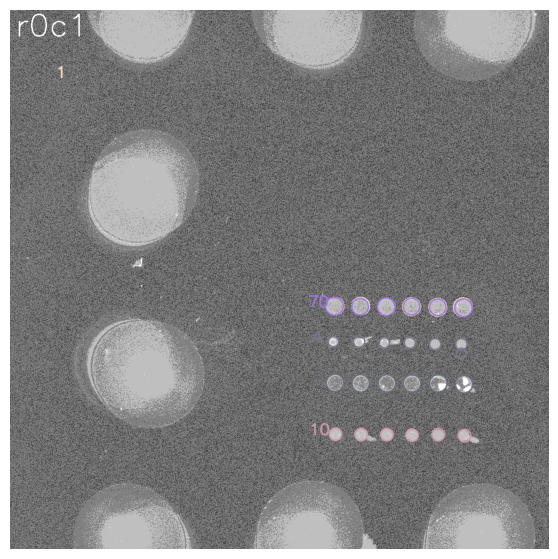

blockr0c2 has 5 clusters which is wrong!
->[2, 5, 11, 71, 72]

 

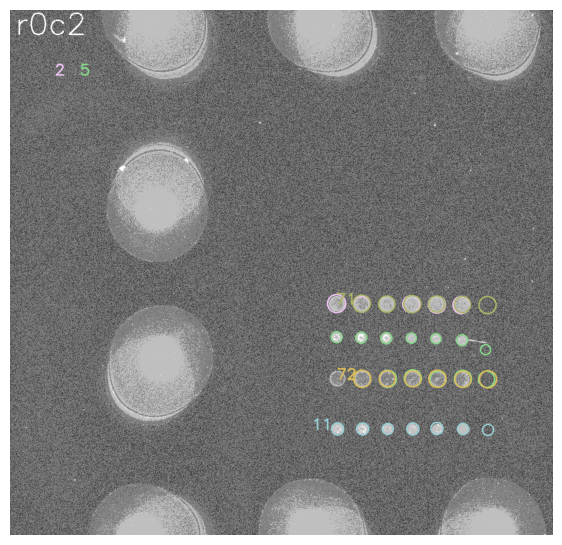

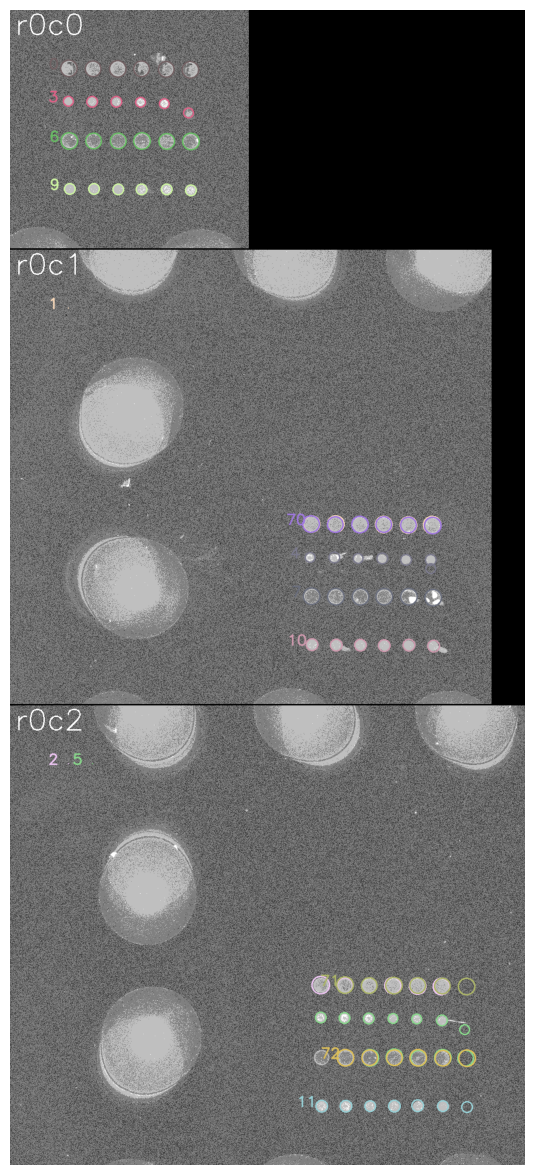

In [360]:
# row 0
r = 0
plot_results = False if start_over else True
current_list = rows_names_list[r]
fig_size = [10,10] if scan_data.assay == 'SD4' else [15,15]
print(current_list)

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={'r0c0':[0,0],'r0c1':[50,0],'r0c2':[50,0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c2'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            # 1:['del'],2:['del'],5:['del']
        }
    )

elif plot_results:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)

# print(scan_data.get_block('r0c1').full_report(1))

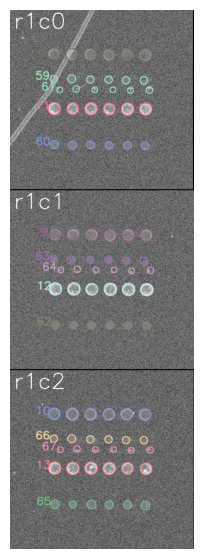

In [274]:
## row 1
r = 1
current_list = rows_names_list[r]

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        # move_whole_block_match={'r1c0':[0,0],'r1c1':[0,0],'r1c2':[0,-100]},
        manual_spot_edit_dict={
            59:['add 1 to r'], 9:['change_r spot0 r-2','move spot0 2 d, 1 l'],
        63:['add 1 to r'],
        }
    )

elif plot_results:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)

['r2c0', 'r2c1', 'r2c2']

 

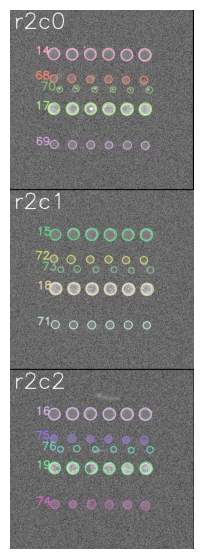

In [275]:
# row 2
r = 2
current_list = rows_names_list[r]
print(current_list)

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        # move_whole_block_match={'r2c0':[0,0],'r2c1':[10,0],'r2c2':[90,30],'r2c3':[-30,-194]},
        manual_spot_edit_dict={
            # 179:['move all 2 u, 2 l']
        }
    )

elif plot_results:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)

['r3c0', 'r3c1', 'r3c2']

 

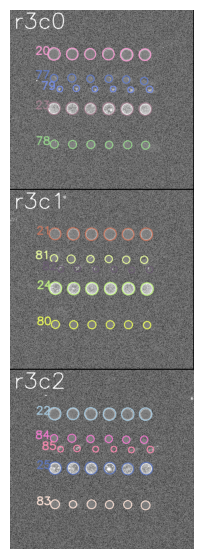

In [276]:
# row 3
r = 3
current_list = rows_names_list[r]
print(current_list)

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        # move_whole_block_match={'r3c0':[20,0],'r3c1':[20,200],'r3c2':[0,-100]},
        manual_spot_edit_dict={
            77:['move spot-1 4 d'],
            82:['move spot-1 3 l']
        }
    )

elif plot_results:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [277]:
# row 4
r = 4
start_over = 1
current_list = rows_names_list[r]
print(current_list)

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        # move_whole_block_match={'r4c0':[0,0],'r4c1':[0,0],'r4c2':[0,0],'r4c3':[50,0]},
        manual_spot_edit_dict={
            30:['del'], 26:['del spot0'], 27:['add 2 clusters below d=50'],
            91:['change_r all r-5','move all 22 d, 3 l','move spot-1 3 d'],
            92:['change_r all r-7','move all 7 r, 3 d']
        }
    )

elif plot_results:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


['r4c0', 'r4c1', 'r4c2']
block_mask is not here... :| !!!


AttributeError: 'NoneType' object has no attribute 'shape'

['r5c0', 'r5c1', 'r5c2']

 

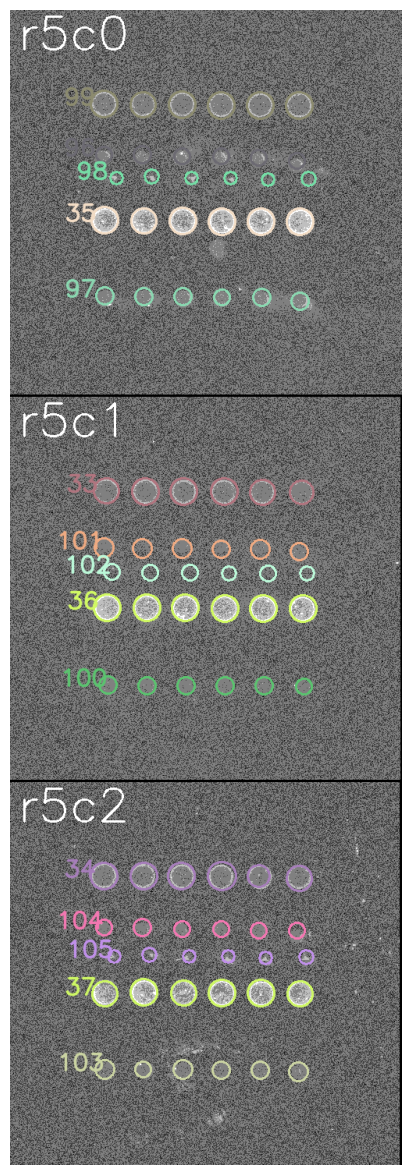

In [194]:
# row 5
r = 5
current_list = rows_names_list[r]
print(current_list)

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        # move_whole_block_match={'r5c0':[0,0],'r5c1':[0,0], 'r5c2':[0,-100]},
        manual_spot_edit_dict={
            32:['del'],
            35:['add 1 cluster above d=150'],
            37:['change_r spot0 r-2','move spot0 2 d, 1 r'],
            99:['move all 1 l, 1 d'], 97:['move spot-1 4 d'],
            104:['move all 1 u, 2 r'],105:['move all 6 d, 3 l']
        }
    )

elif plot_results:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


['r6c0', 'r6c1', 'r6c2']

 

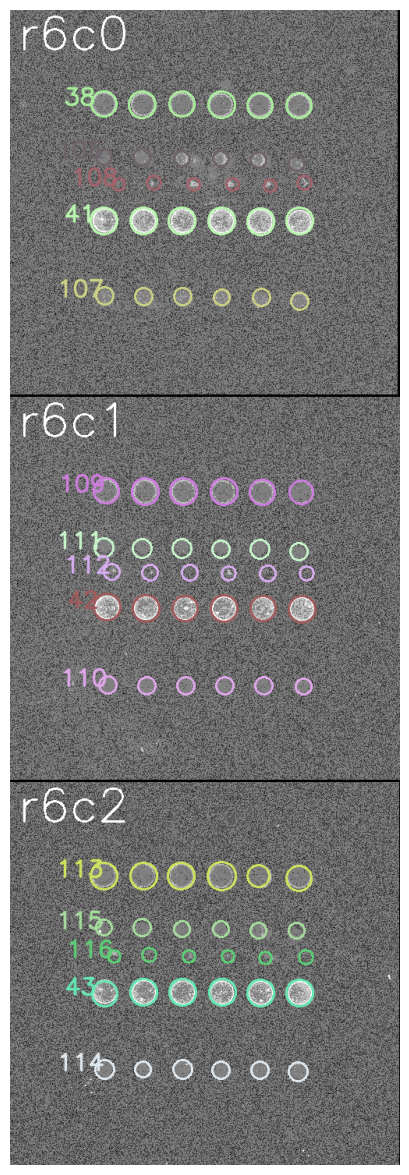

In [207]:
# row 6
r = 6
current_list = rows_names_list[r]
print(current_list)

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        # move_whole_block_match={'r6c1':[20,20],'r6c2':[100,0]},
        manual_spot_edit_dict={
            40:['del'],38:['del spot0'],
            108:['move all 8 d, 3 r','move spot-1 8 l, 3 u'],
            106:['move all 3 d']
        }
    )

elif plot_results:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


['r7c0', 'r7c1', 'r7c2']

 

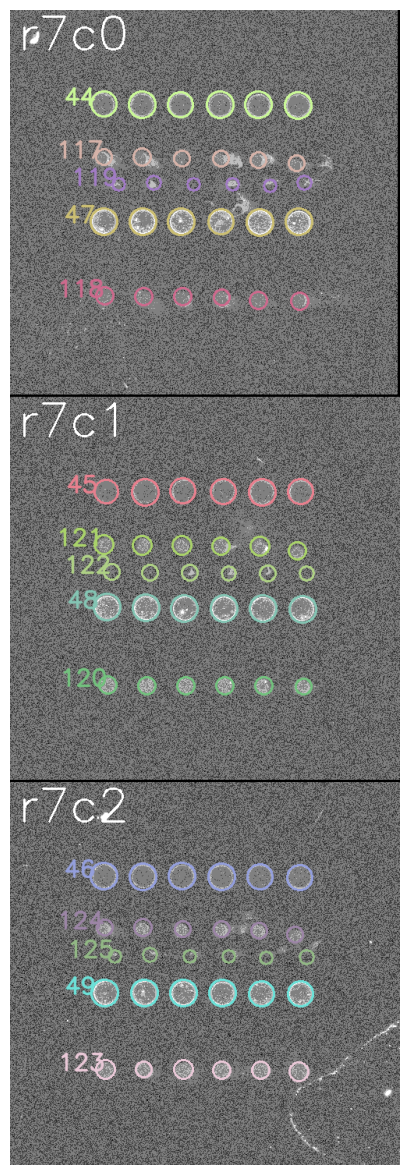

In [220]:
##### row 7
r = 7
current_list = rows_names_list[r]
print(current_list)

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        move_whole_block_match={'r7c0':[0,0], 'r7c1':[0,0],'r7c2':[0,0],'r7c3':[0,0], },
        manual_spot_edit_dict={
            39:['del'],44:['del spot0','move spot-2 2 u, 2 l'],
            45:['del spot0','change_r spot0 r-1','change_r spot2 r-2'],
            46:['del spot0','change_r spot1 r-1','change_r spot2 r-1','move spot1 2 d, 2 l'],
            121:['move all 4 u','move spot-1 3 d, 2 l'],
            124:['move spot-1 3 l, 5 d'],
            118:['move spot-2 4 d, 4 l']

        }
    )

elif plot_results:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [221]:
##### row 8
if scan_data.block_nrow > 8:
    r = 8
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
            debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
            preprocess_params=scan_data.preprocess_params, plot_before_after=0,
            move_whole_block_match={'r8c0':[0,0], 'r8c1':[0,0],'r8c2':[0,0],},
            manual_spot_edit_dict={
            }
        )

    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [222]:
##### row 9
if scan_data.block_nrow > 8:
    r = 9
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N, fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            move_whole_block_match={'r9c0':[0,-200],'r9c2':[0,-200]},
            manual_spot_edit_dict={
            }
        )

    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [223]:
##### row 10
if scan_data.block_nrow > 8:
    r = 10
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N, fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            move_whole_block_match={'r10c0':[0,-200]},
            manual_spot_edit_dict={
                # 139:['change_r all r+1','move spot0 3 l, 6 d']
            }
        )

    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)



In [224]:
##### row 11
if scan_data.block_nrow > 8:
    r = 11
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            move_whole_block_match={'r11c0':[0,-200],'r11c1':[0,-200]},
            manual_spot_edit_dict={
            }
        )

    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [225]:
##### row 12
if scan_data.block_nrow > 8:
    r = 12
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            move_whole_block_match={'r12c0': [0,-200],'r12c2': [0,0],'r12c3': [-50,-400],},
            manual_spot_edit_dict={
            }
        )

    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [226]:
##### row 13
if scan_data.block_nrow > 8:
    r = 13
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            move_whole_block_match={'r13c1': [0,0], 'r13c3': [0,-100],},
            manual_spot_edit_dict={
            }
        )
    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [227]:
    ##### row 14
if scan_data.block_nrow > 8:
        r = 14
        current_list = rows_names_list[r]
        print(current_list)

        if start_over:
            ClassesFunctions.edit_multiple_blocks(
                current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N, fig_size=fig_size,
                debug=0, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
                move_whole_block_match={'r14c3':[50,0]},
                manual_spot_edit_dict={
                }
            )

        elif plot_results:
            ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [228]:
# scan_data.get_block('r15c0').update_block_start_end_from_clusters_min_max()

In [229]:
##### row 15
if scan_data.block_nrow > 8:
    r = 15
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            manual_spot_edit_dict={
            }
        )


    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [230]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)


In [234]:
scan_data.cAb_names = ['cAb1', 'cAb2', 'cAb3', 'cAb4', 'cAb5']
scan_data.cAb_names

['cAb1', 'cAb2', 'cAb3', 'cAb4', 'cAb5']

In [250]:
## Additional test info and labeling
scan_data = ScanDataObj.get_scan_data(file_name=input_file_name)


In [251]:
scan_data.get_block('r2c0').Ag_conc

62.5

In [252]:
# scan_data.get_block('r1c0').plot_block(description='cAb_names')

In [253]:
out_dfs = []
sigma1 = 1.5
sigma2 = 2

# this one goes row by row:
for r in range(scan_data.block_nrow):
    block_ids_list = rows_names_list[r]
    out_df, counts = ClassesFunctions.measure_signal_of_blocks(
        block_ids_list=block_ids_list,
        file_name=input_file_name,
        sigma1=sigma1,
        sigma2=sigma2,
        fg_inc_pixels=1,
        margin_pixels=3,
        bg_r=6,
        debug=0,
        debug_blocks_ids=[''],
        plot_images=0,
    )
    out_dfs.append(out_df)
#     total_counts += counts1



r0c0 ....
r0c1 ....
r0c2 ....
delete1: 122 (22.1014%), delete2: 0 (0.0000%) -> total delete: 22.10%
r1c0 ....
r1c1 ....
r1c2 ....
delete1: 77 (13.7993%), delete2: 0 (0.0000%) -> total delete: 13.80%
r2c0 ....
r2c1 ....
r2c2 ....
delete1: 59 (10.5735%), delete2: 0 (0.0000%) -> total delete: 10.57%
r3c0 ....
r3c1 ....
r3c2 ....
delete1: 48 (8.6022%), delete2: 0 (0.0000%) -> total delete: 8.60%
r4c0 ....
r4c1 ....
r4c2 ....
delete1: 62 (11.1111%), delete2: 0 (0.0000%) -> total delete: 11.11%
r5c0 ....
r5c1 ....
r5c2 ....
delete1: 93 (16.6667%), delete2: 0 (0.0000%) -> total delete: 16.67%
r6c0 ....
r6c1 ....
r6c2 ....
delete1: 94 (16.8459%), delete2: 0 (0.0000%) -> total delete: 16.85%
r7c0 ....
r7c1 ....
r7c2 ....
delete1: 100 (17.9211%), delete2: 0 (0.0000%) -> total delete: 17.92%


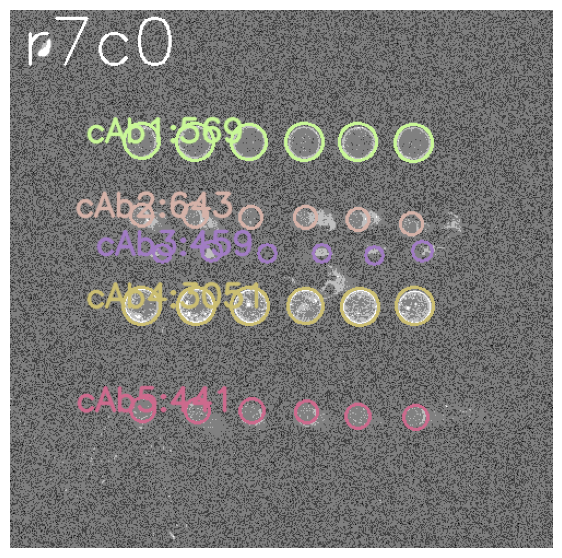

Block_ID  Col  Row  Ag_Conc.   target dAb_name cAb_name  Cluster_ID  \
0     r7c0    0    7       0.0  Omicron    dAb34     cAb1          44   
1     r7c0    0    7       0.0  Omicron    dAb34     cAb1          44   
2     r7c0    0    7       0.0  Omicron    dAb34     cAb1          44   
3     r7c0    0    7       0.0  Omicron    dAb34     cAb1          44   
4     r7c0    0    7       0.0  Omicron    dAb34     cAb1          44   
5     r7c0    0    7       0.0  Omicron    dAb34     cAb1          44   

   Spot_Index    F    B  F_B  F_B_PostProcess  Average_F_B_PostProcess  
0           0  848  151  697              NaN               569.360397  
1           1  659  150  509       509.414272               569.360397  
2           2  746  149  597       597.307436               569.360397  
3           3  657  151  506       506.625372               569.360397  
4           4  788  150  638       638.093162               569.360397  
5           5  745  150  595       595.361744               569.360397

In [254]:
# wanna see everything for Z in rXcY:
cAb = 'cAb1'
row_id = 7
block_id = f'r{row_id}c0'
df1 = out_dfs[row_id]
df = df1[(df1['cAb_name']==cAb) & (df1['Block_ID']==block_id)]
scan_data.get_block(block_id).plot_block(description='cAb:intensities', crop_to_mask=1)
# print(df)
df

In [241]:
# formated_path

In [256]:
dosave=True
formated_path = path + input_file_name + '_scan_values'

if dosave:
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    intensities_df = pd.concat(out_dfs, ignore_index=True)
    with open(formated_path+'.pickle', 'wb') as file:
        pickle.dump(intensities_df, file)

    intensities_writer = pd.ExcelWriter(formated_path + '.xlsx')
    intensities_df.to_excel(intensities_writer, index=True)
    intensities_writer.close()


    print(f'saved intensities_df {intensities_df.shape}.')

else:
    with open(formated_path+'.pickle', 'rb') as file:
        intensities_df = pickle.load(file)
        print(f'loaded intensities_df {intensities_df.shape}')


intensities_df

saved intensities_df (718, 14).


Block_ID  Col  Row  Ag_Conc.   target dAb_name cAb_name  Cluster_ID  \
0       r0c0    0    0     250.0  Omicron    dAb34     cAb1           0   
1       r0c0    0    0     250.0  Omicron    dAb34     cAb1           0   
2       r0c0    0    0     250.0  Omicron    dAb34     cAb1           0   
3       r0c0    0    0     250.0  Omicron    dAb34     cAb1           0   
4       r0c0    0    0     250.0  Omicron    dAb34     cAb1           0   
..       ...  ...  ...       ...      ...      ...      ...         ...   
713     r7c2    2    7       0.0  Omicron    dAb34     cAb5         123   
714     r7c2    2    7       0.0  Omicron    dAb34     cAb5         123   
715     r7c2    2    7       0.0  Omicron    dAb34     cAb5         123   
716     r7c2    2    7       0.0  Omicron    dAb34     cAb5         123   
717     r7c2    2    7       0.0  Omicron    dAb34     cAb5         123   

     Spot_Index     F    B  F_B  F_B_PostProcess  Average_F_B_PostProcess  
0             0   803  147  656              NaN                575.06337  
1             1   645  150  495              NaN                575.06337  
2             2   742  154  588       588.406524                575.06337  
3             3   711  152  559       559.959849                575.06337  
4             4   752  149  603       603.493099                575.06337  
..          ...   ...  ...  ...              ...                      ...  
713           1   783  129  654       654.628647                597.29744  
714           2   723  130  593       593.000000                597.29744  
715           3  1023  131  892              NaN                597.29744  
716           4   803  131  672       672.126984                597.29744  
717           5   686  134  552       552.007561                597.29744  

[718 rows x 14 columns]

In [257]:
# to see what has been deleted.....
subset = intensities_df[intensities_df['F_B_PostProcess'].isnull()]

block_cab_pairs = set(zip(subset['Block_ID'], subset['cAb_name']))

filtered_df = intensities_df[
    intensities_df[['Block_ID', 'cAb_name']].apply(tuple, axis=1).isin(block_cab_pairs)
]

print(filtered_df.shape)
filtered_df.head(18)


(550, 14)


Block_ID  Col  Row  Ag_Conc.   target dAb_name cAb_name  Cluster_ID  \
0      r0c0    0    0     250.0  Omicron    dAb34     cAb1           0   
1      r0c0    0    0     250.0  Omicron    dAb34     cAb1           0   
2      r0c0    0    0     250.0  Omicron    dAb34     cAb1           0   
3      r0c0    0    0     250.0  Omicron    dAb34     cAb1           0   
4      r0c0    0    0     250.0  Omicron    dAb34     cAb1           0   
5      r0c0    0    0     250.0  Omicron    dAb34     cAb1           0   
6      r0c0    0    0     250.0  Omicron    dAb34     cAb2          50   
7      r0c0    0    0     250.0  Omicron    dAb34     cAb2          50   
8      r0c0    0    0     250.0  Omicron    dAb34     cAb2          50   
9      r0c0    0    0     250.0  Omicron    dAb34     cAb2          50   
10     r0c0    0    0     250.0  Omicron    dAb34     cAb2          50   
11     r0c0    0    0     250.0  Omicron    dAb34     cAb3          52   
12     r0c0    0    0     250.0  Omicron    dAb34     cAb3          52   
13     r0c0    0    0     250.0  Omicron    dAb34     cAb3          52   
14     r0c0    0    0     250.0  Omicron    dAb34     cAb3          52   
15     r0c0    0    0     250.0  Omicron    dAb34     cAb3          52   
16     r0c0    0    0     250.0  Omicron    dAb34     cAb3          52   
17     r0c0    0    0     250.0  Omicron    dAb34     cAb4           3   

    Spot_Index     F    B   F_B  F_B_PostProcess  Average_F_B_PostProcess  
0            0   803  147   656              NaN               575.063370  
1            1   645  150   495              NaN               575.063370  
2            2   742  154   588       588.406524               575.063370  
3            3   711  152   559       559.959849               575.063370  
4            4   752  149   603       603.493099               575.063370  
5            5   695  147   548       548.394007               575.063370  
6            0   630  149   481       481.843501               446.894128  
7            1   550  153   397       397.369615               446.894128  
8            2   466  159   307              NaN               446.894128  
9            3   659  158   501       501.100796               446.894128  
10           4   558  151   407       407.262599               446.894128  
11           0   420  149   271       271.758893               298.214616  
12           1   399  154   245       245.917981               298.214616  
13           2   573  161   412              NaN               298.214616  
14           3   508  161   347       347.395257               298.214616  
15           4   494  150   344       344.067194               298.214616  
16           5   427  146   281       281.933754               298.214616  
17           0  3124  146  2978              NaN              2031.749366

In [249]:
grouped = intensities_df.groupby(['Row', 'Col', 'cAb_name']) ['Average_F_B_PostProcess'].mean().reset_index()
grouped = grouped.sort_values(by=['Row', 'Col'])

grouped['number'] = grouped.apply(lambda x: f"{x['Row']}_{x['Col']}", axis=1)

grouped[grouped['cAb_name']=='cAb1'].head(10)



Row  Col cAb_name  Average_F_B_PostProcess number
0     0    0     cAb1               575.063370    0_0
5     0    1     cAb1               449.506102    0_1
10    0    2     cAb1               461.070069    0_2
15    1    0     cAb1               485.058596    1_0
20    1    1     cAb1               486.250830    1_1
25    1    2     cAb1               579.417092    1_2
30    2    0     cAb1               599.005690    2_0
35    2    1     cAb1               526.343911    2_1
40    2    2     cAb1               616.400051    2_2
45    3    0     cAb1               603.083769    3_0

In [ ]:
results_df = grouped.pivot_table(index=['target', 'Ag_Conc.'], columns=[ 'dAb_cAb_rep'],
                                 values='Average_F_B_PostProcess').sort_values(by='Ag_Conc.',ascending=False)
print(results_df.shape)
results_df


In [ ]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

formated_path = path + input_file_name + '_summary'
results_writer = pd.ExcelWriter(formated_path + '.xlsx')
results_df.to_excel(results_writer, index=True)
results_writer.close()

with open(formated_path+'.pickle', 'wb') as file:
    pickle.dump(results_df, file)
